### Train Model :
* **Importing necessary libraries**
* **Loading Training data and Testing data**
* **Independent and Dependent variable creation**
* **Feature Transformation using ColumnTransformer**
* **Creating multiple models with default parameters with smote and without smote to see which model is performing well with the dataset**
* **Model Creation**
    * ***Hypertuning Logistic Regression parameters using GridsearchCV***
    * ***Hypertuning Support Vector Classifier parameters using GridsearchCV***
    * ***Hypertuning Decision Tree Classifier parameters using RandomizedSearchCV***
    * ***Hypertuning Random Forest Classifier parameters using RandomizedSearchCV***
    * ***Hypertuning AdaBoost Classifier parameters using RandomizedSearchCV***
    * ***Hypertuning Gradient Boosting Classifier parameters using RandomizedSearchCV***
    * ***Model creation using Stacking Classifier (LogisticRegression + SVC + RandomForestClassifier)***
* **Exporting Trained Models**

#### Importing necessary libraries

In [98]:
#Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np

# Plotting pie chart distribution
import matplotlib.pyplot as plt

# Pipeline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # used imblearn pipeline to invoke sampling technique

# Feature Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,StandardScaler

# Oversampling
from imblearn.over_sampling import SMOTE

# Feature Extration / Dimensionality reduction
from sklearn.decomposition import PCA

# Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

# Hypertuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Cross-Validation
from sklearn.model_selection import StratifiedKFold

# Export Trained models
import pickle

import warnings
warnings.filterwarnings("ignore")

#### Loading the Training data and Testing data

In [122]:
#Loading the data
file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/processed/'
train_data = pd.read_csv(file_location + 'train_data.csv')
test_data = pd.read_csv(file_location + 'test_data.csv')

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    960 non-null    int64 
 1   Age                           960 non-null    int64 
 2   MaritalStatus                 960 non-null    object
 3   EmpDepartment                 960 non-null    object
 4   EmpJobRole                    960 non-null    object
 5   BusinessTravelFrequency       960 non-null    object
 6   DistanceFromHome              960 non-null    int64 
 7   EmpEducationLevel             960 non-null    int64 
 8   EmpEnvironmentSatisfaction    960 non-null    int64 
 9   EmpHourlyRate                 960 non-null    int64 
 10  EmpJobInvolvement             960 non-null    int64 
 11  EmpJobLevel                   960 non-null    int64 
 12  NumCompaniesWorked            960 non-null    int64 
 13  OverTime            

In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    240 non-null    int64 
 1   Age                           240 non-null    int64 
 2   MaritalStatus                 240 non-null    object
 3   EmpDepartment                 240 non-null    object
 4   EmpJobRole                    240 non-null    object
 5   BusinessTravelFrequency       240 non-null    object
 6   DistanceFromHome              240 non-null    int64 
 7   EmpEducationLevel             240 non-null    int64 
 8   EmpEnvironmentSatisfaction    240 non-null    int64 
 9   EmpHourlyRate                 240 non-null    int64 
 10  EmpJobInvolvement             240 non-null    int64 
 11  EmpJobLevel                   240 non-null    int64 
 12  NumCompaniesWorked            240 non-null    int64 
 13  OverTime            

In [125]:
train_data.head()

,Unnamed: 0,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,437,28,Single,Sales,Sales Executive,Travel_Frequently,7,3,3,55,3,2,0,No,14,4,3,2,1,No,3
1,1091,25,Single,Sales,Sales Executive,Travel_Rarely,4,2,2,99,2,2,1,Yes,11,2,3,4,1,No,2
2,327,25,Single,Research & Development,Research Scientist,Travel_Rarely,1,3,4,40,3,1,1,No,18,4,2,2,2,No,3
3,576,31,Married,Sales,Sales Executive,Travel_Rarely,5,3,1,51,3,2,1,No,19,3,3,2,0,No,4
4,1078,30,Married,Sales,Sales Representative,Travel_Rarely,2,1,3,72,3,1,1,No,18,1,3,0,0,No,3


In [126]:
test_data.head()

,Unnamed: 0,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,811,35,Married,Development,Business Analyst,Travel_Rarely,23,4,3,30,3,1,3,Yes,15,3,3,2,2,No,3
1,1149,26,Single,Development,Developer,Travel_Rarely,24,3,3,66,1,1,1,Yes,18,2,1,0,0,Yes,3
2,662,36,Married,Sales,Sales Executive,Travel_Rarely,17,2,3,33,2,2,2,No,16,3,1,2,1,No,2
3,542,53,Married,Finance,Finance Manager,Travel_Rarely,24,4,2,48,4,3,3,No,15,3,3,3,1,No,2
4,858,34,Divorced,Development,Business Analyst,Travel_Rarely,6,4,3,45,2,2,6,No,15,3,3,0,0,No,3


Unnamed: 0 column is the index from the raw data, hence we can ignore that column

#### Independent and Dependent variable creation

In [129]:
X_train = train_data.iloc[:,1:-1] # Independent variable
y_train = train_data.PerformanceRating # Dependent variable

X_test = test_data.iloc[:,1:-1] # Independent variable
y_test = test_data.PerformanceRating # Dependent variable

In [130]:
X_train.shape,X_test.shape

((960, 19), (240, 19))

In [131]:
y_train.value_counts(), y_test.value_counts()

(3    699
 2    155
 4    106
 Name: PerformanceRating, dtype: int64,
 3    175
 2     39
 4     26
 Name: PerformanceRating, dtype: int64)

Text(0.5, 1.0, 'Training Data - Target distributions')

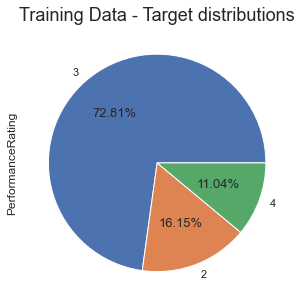

In [132]:
# Plotting pie chart for y_train distribution of PerformanceRating
plt.rc('font', size=13) 
plt.rcParams["figure.figsize"] = (5,5)
y_train.value_counts().plot(kind='pie',autopct = '%0.2f%%')
plt.title("Training Data - Target distributions",fontsize=18)

We will oversample the training data using SMOTE sampling technique and see how the model is performing

#### Feature Transformation using ColumnTransformer

In [133]:
X_train.dtypes

Age                              int64
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
EmpWorkLifeBalance               int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
Attrition                       object
dtype: object

In [134]:
# Updating the numerical_features,categorical_features and positively_skewed lists
numerical_features_updated = ['Age',
                              'DistanceFromHome',
                              'EmpHourlyRate',
                              'NumCompaniesWorked',
                              'EmpLastSalaryHikePercent',
                              'ExperienceYearsInCurrentRole',
                              'YearsSinceLastPromotion']

categorical_features_updated =['MaritalStatus',
                               'EmpDepartment',
                               'EmpJobRole',
                               'BusinessTravelFrequency',
                               'EmpEducationLevel',
                               'EmpEnvironmentSatisfaction',
                               'EmpJobInvolvement',
                               'EmpJobLevel',
                               'OverTime',
                               'EmpRelationshipSatisfaction',
                               'EmpWorkLifeBalance',
                               'Attrition']

positively_skewed_updated = ['DistanceFromHome',
                             'NumCompaniesWorked',
                             'EmpLastSalaryHikePercent',
                             'ExperienceYearsInCurrentRole',
                             'YearsSinceLastPromotion'
                            ]

In [135]:
X_train[categorical_features_updated].nunique()

MaritalStatus                   3
EmpDepartment                   6
EmpJobRole                     19
BusinessTravelFrequency         3
EmpEducationLevel               5
EmpEnvironmentSatisfaction      4
EmpJobInvolvement               4
EmpJobLevel                     5
OverTime                        2
EmpRelationshipSatisfaction     4
EmpWorkLifeBalance              4
Attrition                       2
dtype: int64

* Categorical features will be handled by using OnehotEncoding Technique with dropping first column
* Positive skewed numerical features will be handled using Square Root Transformation through FunctionTransformer
* Numerical features will be scaled using StandardScaler to get standardized distribution

In [136]:
cols_trans = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown = 'ignore',drop = 'first'), categorical_features_updated),
    ('square_root_transformation', FunctionTransformer(np.sqrt), positively_skewed_updated),
    ('scale_continuos_features', StandardScaler(), numerical_features_updated)])  

In [137]:
# Total number of features after encoding the categorical variabales using One Hot Encoding Technique
print('Total number of categorical features before applying One Hot Encoding Technique',len(categorical_features_updated))
print('Total number of expected categorical features after applying One Hot Encoding Technique',
      X_train[categorical_features_updated].nunique().sum() - len(categorical_features_updated))
print('Total number of features before Feature Transformation :',X_train.shape[1])
print('Total number of features after Feature Transformation will be',
      X_train[categorical_features_updated].nunique().sum() - 
      len(categorical_features_updated) + len(numerical_features_updated))

Total number of categorical features before applying One Hot Encoding Technique 12
Total number of expected categorical features after applying One Hot Encoding Technique 49
Total number of features before Feature Transformation : 19
Total number of features after Feature Transformation will be 56


Feature extraction will be done using Principal Component Analysis (PCA) technique to reduce the dimensionality of the transformed dataset. 

#### Creating multiple models with default parameters with smote and without smote to see which model is performing well with the  dataset

In [138]:
# setting default parameter for multiple models
logistic = LogisticRegression(random_state=42,class_weight='balanced')
svc = SVC(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
random_forest = RandomForestClassifier(random_state=42,class_weight='balanced')
adaboost = AdaBoostClassifier(random_state=42)
gradient = GradientBoostingClassifier(random_state=42)

In [139]:
models = [logistic,svc,decision_tree,random_forest,adaboost,gradient]

models_list = ['LogisticRegression','Support Vector Classifier','Decision Tree Classifier',
               'Random Forest Classifier','AdaBoost Classifier','Gradient Boosting Classifier']

# Creating empty lists to store the results
train_score = []
test_score = []
train_score_smote = []
test_score_smote = []

for model in models:
    # model creation without using sampling technique SMOTE and check performance
    model_ = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA(n_components=45)), # Feature Extraction
                             ('lr_multi',model)]).fit(X_train,y_train) # build and train the model 
    train_score.append(model_.score(X_train, y_train)) # Train score 
    test_score.append(model_.score(X_test, y_test)) # Test score
    
    # model creation using sampling technique SMOTE and check performance
    model_ = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('over_sampling', SMOTE(random_state=40,sampling_strategy='minority')), #sampling technique to handle imbalance data
                             ('pca', PCA(n_components=45)), # Feature Extraction
                             ('lr_multi',model)]).fit(X_train,y_train) # build and train the model
    train_score_smote.append(model_.score(X_train, y_train))
    test_score_smote.append(model_.score(X_test, y_test))

results_list = list(zip(train_score,train_score_smote,test_score,test_score_smote))
result_df = pd.DataFrame(results_list,columns=['train_score','train_score_smote','test_score','test_score_smote'],
                        index = models_list)
result_df

,train_score,train_score_smote,test_score,test_score_smote
LogisticRegression,0.863542,0.872917,0.866667,0.858333
Support Vector Classifier,0.939583,0.952083,0.833333,0.829167
Decision Tree Classifier,1.000000,1.000000,0.808333,0.725000
Random Forest Classifier,1.000000,1.000000,0.800000,0.783333
AdaBoost Classifier,0.872917,0.831250,0.816667,0.725000
Gradient Boosting Classifier,1.000000,1.000000,0.850000,0.783333


* As pipeline is used for Data Pre-processing, n_components for PCA is decided based on the results from multiple manual execution of the pipeline.
* Models performing good without SMOTE oversampling technique, so prediction models created without using SMOTE.

#### Model Creation

* Feature Transformation and Feature Extraction (using Principal Component Analysis) is performed during model creation via pipeline.
* PCA hyperparameter n_component hypertuned with range 40-45 to improve the model performance
* As the training data is imbalanced, f1_macro is used instead of accuracy as scoring parameter for Hyperparameter tuning.
* Macro Average F1 score is the unweighted mean of the F1 scores calculated per class. So, it is used as scoring parameter for hypertuning model
* StratifiedKFold Cross Validation Technique with 3 splits to understand the consistency of the model with different subset data as the measure of model stability using mean and standard deviation of the performance scores.

##### Hypertuning Logistic Regression parameters using GridsearchCV

In [198]:
# Creating model and hyperparameter tuning using Gridsearchcv
pipe_lr = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('lr',LogisticRegression(random_state=42,class_weight='balanced'))]) # build the model 
#setting parameters
parameter = {
    'pca__n_components' : [40, 41, 42, 43, 44, 45],
    'lr__max_iter' : [50, 100, 200, 400, 500, 600],
    'lr__solver' :['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'lr__C': [0.0001,0.001,0.01,1,10,100,1000]
}

# Hyperparameter tuning
logistic = GridSearchCV(estimator=pipe_lr,param_grid=parameter,scoring='f1_macro',
                        cv=StratifiedKFold(n_splits=3),
                        n_jobs=-1,return_train_score=True,
                        error_score='raise').fit(X_train,y_train) 

print('Best f1_macro score : ',logistic.best_score_)

# Logistic Regression CV results
pd.DataFrame(logistic.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.7691500091850942


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__max_iter,param_lr__solver,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
544,0.103533,6.785093e-03,0.019869,3.872414e-03,1,50,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 50, 'lr__solver':...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873
574,0.138254,1.291114e-02,0.032315,3.299850e-03,1,100,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 100, 'lr__solver'...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873
604,0.078119,2.247832e-07,0.020832,7.365696e-03,1,200,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 200, 'lr__solver'...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873
634,0.072912,7.364066e-03,0.015624,1.030086e-06,1,400,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 400, 'lr__solver'...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873
664,0.067703,7.365190e-03,0.031248,2.973602e-07,1,500,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 500, 'lr__solver'...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873
694,0.071476,8.893069e-03,0.015624,4.495664e-07,1,600,liblinear,44,"{'lr__C': 1, 'lr__max_iter': 600, 'lr__solver'...",0.754984,0.787274,0.765192,0.76915,0.013476,1,0.830867,0.860586,0.831457,0.84097,0.013873


In [140]:
# Using best Hyperparameter, build and train the model
pipe_lr_hyper = Pipeline(steps=[('trans', cols_trans),
                                ('pca', PCA(n_components = 44)), # Feature Extraction
                                ('lr',LogisticRegression(class_weight='balanced',
                                                         random_state=42,
                                                         solver='liblinear',
                                                         max_iter=50,C=1))]).fit(X_train,y_train)

###### Hypertuning Support Vector Classifier parameters using GridsearchCV

**Model 1**

In [212]:
# Creating model and hyperparameter tuning using GridsearchCV
pipe_svc = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('svc',SVC(random_state=42,class_weight='balanced'))]) # build the model
#setting parameters
parameter = {
                'pca__n_components' : [40, 41, 42, 43, 44, 45],
                'svc__C': [0.1, 1, 10, 100, 1000], 
                'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

# Hyperparameter tuning
svc = GridSearchCV(estimator=pipe_svc,param_grid=parameter,scoring='f1_macro',
                   cv=StratifiedKFold(n_splits=3),n_jobs=-1,
                   return_train_score=True,error_score='raise').fit(X_train,y_train) 

print('Best f1_macro score : ',svc.best_score_)

# SVM CV results
pd.DataFrame(svc.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.7647828746764377


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
194,0.104159,0.007365,0.05208,0.007365,41,1000,0.001,rbf,"{'pca__n_components': 41, 'svc__C': 1000, 'svc...",0.765149,0.771802,0.757398,0.764783,0.005886,1,0.877689,0.884237,0.877051,0.879659,0.003248


In [141]:
# Using best Hyperparameter
pipe_svc_hyper1 = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components = 41)), # Feature Extraction
                                 ('svc',SVC(random_state=42,kernel = 'rbf',class_weight='balanced',
                                            gamma = 0.001, C = 1000))]).fit(X_train,y_train) # train the model

**Noticed that we get better result without using class_weight parameter and increasing n_components by 1**

**Model 2**

In [142]:
# Using best Hyperparameter (without using class_weight parameter and increasing n_components by 1)

pipe_svc_hyper2 = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components = 42)), # Feature Extraction
                                 ('svc',SVC(random_state=42,kernel = 'rbf',
                                            gamma = 0.001, C = 1000))]).fit(X_train,y_train) # train the model

In [143]:
# Using Stratified KFold cross validation technique for new parameters
scores=cross_val_score(pipe_svc_hyper2,X_train,y_train,cv=StratifiedKFold(n_splits=3),scoring='f1_macro')
print('f1_macro score : ',np.mean(scores))
print('standard deviation score : ',scores.std())

f1_macro score :  0.7901798833901462
standard deviation score :  0.014769139651799648


In [144]:
scores

array([0.775     , 0.81019438, 0.78534527])

SVC Model without using class_weight parameter performing better 

###### Hypertuning Decision Tree Classifier parameters using RandomizedSearchCV

In [202]:
# Creating model and hyperparameter tuning using RandomizedSearchCV
pipe_decision = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('decision',DecisionTreeClassifier(random_state=42,class_weight='balanced'))]) # build the model

#setting parameters
parameter = {
                'pca__n_components' : [40, 41, 42, 43, 44, 45],
                'decision__max_depth' : [int(x) for x in np.linspace(1,20,num=5)],
                'decision__min_samples_split' : [int(x) for x in np.linspace(8,60,5)],
                'decision__min_samples_leaf' : [int(x) for x in np.linspace(1,20,num=5)]
            }

# Hypertuning
decision = RandomizedSearchCV(estimator=pipe_decision,param_distributions=parameter,
                   scoring='f1_macro',cv=StratifiedKFold(n_splits=3),n_jobs=-1,return_train_score=True,
                   error_score='raise',n_iter=100,random_state=42).fit(X_train,y_train)

print('Best f1_macro score : ',decision.best_score_)

# Decision Tree Classifier CV results
pd.DataFrame(decision.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.6590822557679176


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_decision__min_samples_split,param_decision__min_samples_leaf,param_decision__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
92,0.094789,0.001479,0.020833,0.007365,40,8,5,20,"{'pca__n_components': 40, 'decision__min_sampl...",0.683227,0.661151,0.632868,0.659082,0.020611,1,0.846803,0.852289,0.855563,0.851552,0.003614


In [145]:
# Using best Hyperparameter and checking performance of the model
pipe_decision_hyper = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components=40)), # Feature Extraction
                                 ('decision',DecisionTreeClassifier(random_state=42,
                                                                    min_samples_split=8,
                                                                    min_samples_leaf=5,
                                                                    max_depth=20))]).fit(X_train,y_train) # train the model

###### Hypertuning Random Forest Classifier parameters using RandomizedSearchCV

In [203]:
# Creating model and hyperparameter tuning using RandomizedSearchCV
pipe_random_forest = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('rf',RandomForestClassifier(random_state=42,class_weight='balanced'))]) # build the model

#setting parameters
parameter = {
                'pca__n_components' : [40, 41, 42, 43, 44, 45],
                'rf__n_estimators' : [50, 100, 200, 400, 500, 600, 800, 1000],
                'rf__max_depth' : [int(x) for x in np.linspace(1,20,num=10)],
                'rf__min_samples_split' : [int(x) for x in np.linspace(8,60,10)],
                'rf__min_samples_leaf' : [int(x) for x in np.linspace(1,20,num=10)]
            }

# Hypertuning
rf = RandomizedSearchCV(estimator=pipe_random_forest,param_distributions=parameter,
                   scoring='f1_macro',cv=StratifiedKFold(n_splits=3),n_jobs=-1,return_train_score=True,
                   error_score='raise',n_iter=100,random_state=42).fit(X_train,y_train)

print('Best f1_macro score : ',rf.best_score_)

# Random Forest Classifier CV results
pd.DataFrame(rf.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.7787400093348998


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_rf__min_samples_split,param_rf__min_samples_leaf,param_rf__max_depth,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
74,3.03113,0.020921,0.124991,3.371748e-07,400,8,5,5,44,"{'rf__n_estimators': 400, 'rf__min_samples_spl...",0.791203,0.798432,0.746586,0.77874,0.022927,1,0.909303,0.938938,0.933614,0.927285,0.0129


In [146]:
# Using best Hyperparameter and checking performance of the model
pipe_rf_hyper = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components=44)), # Feature Extraction
                                 ('rf',RandomForestClassifier(random_state=42,
                                                                    class_weight='balanced',
                                                                    n_estimators = 400, 
                                                                    min_samples_split = 8,
                                                                    min_samples_leaf = 5,
                                                                    max_depth = 5))]).fit(X_train,y_train) # train the model

###### Hypertuning AdaBoost Classifier parameters using RandomizedSearchCV

In [204]:
# Creating model and hyperparameter tuning using RandomizedSearchCV
pipe_adaboost = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('adaboost',AdaBoostClassifier(random_state=42))]) # build the model

#setting parameters
parameter = {
    'pca__n_components' : [40, 41, 42, 43, 44, 45],
    'adaboost__n_estimators': [50, 100, 200, 400, 500, 600, 800, 1000],
    'adaboost__learning_rate' : [0.01 , 0.012, 0.014, 0.016, 0.019,0.1] 
}

# Hypertuning
adaboost = RandomizedSearchCV(estimator=pipe_adaboost,param_distributions=parameter,
                   scoring='f1_macro',cv=StratifiedKFold(n_splits=3),n_jobs=-1,return_train_score=True,
                   error_score='raise',n_iter=100,random_state=42).fit(X_train,y_train)

print('Best f1_macro score : ',adaboost.best_score_)

# Adaboost Classifier CV results
pd.DataFrame(adaboost.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.6547474117101233


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_adaboost__n_estimators,param_adaboost__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
56,11.015158,0.046201,0.380182,0.007365,41,800,0.1,"{'pca__n_components': 41, 'adaboost__n_estimat...",0.699549,0.670034,0.59466,0.654747,0.044164,1,0.798067,0.807395,0.793688,0.799717,0.005716


In [147]:
# Using best Hyperparameter and checking performance of the model
pipe_adaboost_hyper = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components=41)), # Feature Extraction
                                 ('adaboost',AdaBoostClassifier(random_state=42,
                                                                n_estimators= 800,
                                                                learning_rate = 0.1))]).fit(X_train,y_train) # train the model

###### Hypertuning Gradient Boosting Classifier parameters using RandomizedSearchCV

In [205]:
# Creating model and hyperparameter tuning using RandomizedSearchCV
pipe_gradient = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                             ('pca', PCA()), # Feature Extraction
                             ('gradient',GradientBoostingClassifier(random_state=42))]) # build the model

#setting parameters
parameter = {
                'pca__n_components' : [40, 41, 42, 43, 44, 45],
                'gradient__n_estimators': [50, 100, 200, 400, 500, 600, 800, 1000],
                'gradient__learning_rate' : [0.01 , 0.012, 0.014, 0.016,0.019,0.1] 
}

# Hypertuning
gradient = RandomizedSearchCV(estimator=pipe_gradient,param_distributions=parameter,
                   scoring='f1_macro',cv=StratifiedKFold(n_splits=3),n_jobs=-1,return_train_score=True,
                   error_score='raise',n_iter=100,random_state=42).fit(X_train,y_train)

print('Best f1_macro score : ',gradient.best_score_)

# Gradient Boosting Classifier CV results
pd.DataFrame(gradient.cv_results_).query('rank_test_score == 1')

Best f1_macro score :  0.7472324989164467


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_gradient__n_estimators,param_gradient__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
98,60.146031,2.158212,0.048638,0.012277,41,600,0.016,"{'pca__n_components': 41, 'gradient__n_estimat...",0.745203,0.753881,0.742614,0.747232,0.004818,1,1.0,1.0,1.0,1.0,0.0


In [148]:
# Using best Hyperparameter and checking performance of the model
pipe_gradient_hyper = Pipeline(steps=[('trans', cols_trans), # Feature Transformation
                                 ('pca', PCA(n_components=41)), # Feature Extraction
                                 ('gradient',GradientBoostingClassifier(random_state=42,
                                                                        n_estimators = 600,
                                                                        learning_rate = 0.016))]).fit(X_train,y_train) # train the model

###### Model creation using Stacking Classifier (LogisticRegression + SVC + RandomForestClassifier)

In [149]:
# Selecting top 3 performing models based on Hypertuning results(f1_macro score) 

# using best parameters with respect to each models used
estimator_list = [
    ('logistic', LogisticRegression(class_weight='balanced',random_state=42,solver='liblinear',max_iter=50,C=1)),
    ('svc', SVC(random_state=42,kernel = 'rbf',gamma = 0.001, C = 1000)),
    ('random_forest',RandomForestClassifier(random_state=42,class_weight='balanced',
                                            n_estimators = 400,min_samples_split = 8,
                                            min_samples_leaf = 5,max_depth = 5))]

# Build stack model
pipe_stack = Pipeline(steps=[('trans', cols_trans),('pca', PCA(n_components=42)),
                                 ('stack',StackingClassifier(estimators=estimator_list,
                                                             final_estimator=SVC(random_state=42,
                                                                                 kernel = 'rbf',
                                                                                 gamma = 0.001, 
                                                                                 C = 1000),
                                                             stack_method  = 'predict',
                                                             cv=StratifiedKFold(n_splits=3),
                                                             n_jobs = -1))]).fit(X_train, y_train) # train the model

LogisticRegression, SVC and RandomForestClassifier models were stacked using Stacking Classifier model and best performing SVC model 2 was used as meta learner for the model to improve the performance of the model.

In [150]:
# Using Stratified KFold cross validation technique for Stacking Classifier
scores=cross_val_score(pipe_stack,X_train,y_train,cv=StratifiedKFold(n_splits=3),scoring='f1_macro')
print('f1_macro score : ',np.mean(scores))
print('standard deviation score : ',scores.std())

f1_macro score :  0.8188111794108272
standard deviation score :  0.028255844759619172


In [151]:
scores

array([0.8239253 , 0.85057574, 0.7819325 ])

#### Exporting Trained Models

In [61]:
# Save all the trained models using pickle
trained_model_list = [pipe_lr_hyper,
                      pipe_svc_hyper1,
                      pipe_svc_hyper2,
                      pipe_knn_hyper,
                      pipe_decision_hyper,
                      pipe_rf_hyper,
                      pipe_adaboost_hyper,
                      pipe_gradient_hyper,
                      pipe_stack]

model = ['Logistic_Regression',
         'Support Vector Classifier_1',
         'Support_Vector_Classifier_2',
         'KNeighbors_Classifier',
         'Decision_Tree_Classifier',
         'Random_Forest_Classifier',
         'AdaBoost_Classifier',
         'Gradient_Boosting_Classifier',
         'Stacking_Classifier']

export_file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/processed/'

# Export trained models using pickle in processed directory
for i,j in zip(trained_model_list,model):
    pickle.dump(i, open(export_file_location + j +'_trained_model.pkl', 'wb'))

### Summary

**Importing necessary libraries**
* pandas
* numpy
* Visualizations using matplotlib
* Pipeline from imblearn is used to create a pipeline to preprocess the data and build the model
* ColumnTransformer to create a transformer from sklearn to be passed in model creation pipeline.
* FunctionTransformer,OneHotEncoder,StandardScaler from sklearn to perform Feature transformations.
* Oversampling Technique SMOTE from imblearn is used as we have imbalanced dataset
* PCA from sklearn is used to reduce the dimensionality of the transformed dataset
* LogisticRegression from sklearn.linear_model for model creation
* SVC from sklearn.svm for model creation
* DecisionTreeClassifier from sklearn.tree for model creation
* Bagging Ensemble techniques such as RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier from sklearn for model creation
* Stacking Ensemble technique StackingClassifier from sklearn for model creation
* Hypertuning the models using GridsearchCV and RandomizedSearchCV
* StratifiedKFold from sklearn for cross validation
* pickle for exporting the trained models 

**Loading Training data and Testing data**
* Train data and Test data are loaded from file location data-> processed -> train_data.csv,test_data.csv 

**Independent and Dependent variable creation**
* Creating X_train and X_test as independent variable and y_train and y_test as dependent variable.
* We have imbalanced training dataset, we will oversample the training data using SMOTE sampling technique and see how the model is performing

**Feature Transformation using ColumnTransformer**
* Lists for categorical, numerical and positively skewed data are created to be used in ColumnTransformer to transform the features.
* Using ColumnTransformer,
	* Categorical features handled by using OnehotEncoding Technique with dropping first column
	* Positive skewed numerical features  handled using Square Root Transformation through FunctionTransformer
	* Numerical features scaled using StandardScaler to get standardized distribution
* Total number of categorical features before applying One Hot Encoding Technique : 12
* Total number of expected categorical features after applying One Hot Encoding Technique : 49
* Total number of features before Feature Transformation : 19
* Total number of features after Feature Transformation will be 56


***Creating multiple models with default parameters with smote and without smote to see which model is performing well with the dataset***
* As pipeline is used for Data Pre-processing, n_components for PCA is decided based on the results from multiple manual execution of the pipeline.
* Models performing good without SMOTE oversampling technique, so prediction models created without using SMOTE.


**Model Creation**
* Feature Transformation and Feature Extraction (using Principal Component Analysis) is performed during model creation via pipeline.
* PCA hyperparameter n_component hypertuned with range 40-45 to improve the model performance
* As the training data is imbalanced, f1_macro is used instead of accuracy as scoring parameter for Hyperparameter tuning.
* Macro Average F1 score is the unweighted mean of the F1 scores calculated per class. So, it is used as scoring parameter for hypertuning model
* StratifiedKFold Cross Validation Technique with 3 splits to understand the consistency of the model with different subset data as the measure of model stability using mean and standard deviation of the performance scores.


***Hypertuning Logistic Regression parameters using GridsearchCV***
* Cross Validation best f1_macro score : 0.7691
* Cross validation Standard Deviation score : 0.0134
* Model is created using best parameters found using GridsearchCV


***Hypertuning Support Vector Classifier parameters using GridsearchCV***

***Model 1***
* Cross Validation best f1_macro score : 0.7647
* Cross validation Standard Deviation score : 0.0058
* Model is created using best parameters found using GridsearchCV          

***Model 2***
* Noticed that we get better result without using class_weight parameter and increasing n_components by 1, so model is created with those updated parameters
* Cross Validation best f1_macro score :  0.7901
 * Cross Validation standard deviation score :  0.0147
 
***Hypertuning Decision Tree Classifier parameters using RandomizedSearchCV***
* Cross Validation best f1_macro score : 0.6590
* Cross validation Standard Deviation score : 0.0206
* Model is created using best parameters found using RandomizedSearchCV

***Hypertuning Random Forest Classifier parameters using RandomizedSearchCV***
* Cross Validation best f1_macro score : 0.7787
* Cross validation Standard Deviation score : 0.0229
* Model is created using best parameters found using RandomizedSearchCV

***Hypertuning AdaBoost Classifier parameters using RandomizedSearchCV***
* Cross Validation best f1_macro score : 0.6547
* Cross validation Standard Deviation score : 0.0441
* Model is created using best parameters found using RandomizedSearchCV

***Hypertuning Gradient Boosting Classifier parameters using RandomizedSearchCV***
* Cross Validation best f1_macro score : 0.7472
* Cross validation Standard Deviation score : 0.0048
* Model is created using best parameters found using RandomizedSearchCV

***Model creation using Stacking Classifier (LogisticRegression + SVC + RandomForestClassifier)***
* Selecting top 3 performing models based on Hypertuning results(f1_macro score) - LogisticRegression(0.7691), SVC model 2(0.7901) and RandomForestClassifier(0.7787)
* Model is created using best parameters with respect to each model.
* LogisticRegression, SVC and RandomForestClassifier models were stacked using Stacking Classifier model and best performing SVC model 2 was used as meta learner for the model to improve the performance of the model.
* Cross Validation best f1_macro score : 0.8188
* Cross validation Standard Deviation score : 0.0282

**Exporting Trained Models**
* All the trained models are exported to processed folder using pickle